# Group Members:
- Noor alawlaqi - S21107270
- Maha Almashharawi - S20106480
- Mashael Alsalamah - S20206926


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.seasonal import seasonal_decompose

In [5]:
data1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasience/1.csv', skiprows=4)
df_melted1 = pd.melt(data1,
                    id_vars=['Country Name','Country Code', 'Indicator Name', 'Indicator Code'],
                    var_name='Year',  # Create a new 'Year' column
                    value_name='Value')  # Create a new 'Value' column for the values

df_melted1 = df_melted1[df_melted1['Year'] >= '1990']
df_melted1 = df_melted1.dropna()
df_melted1.reset_index(drop=True, inplace=True)
df_melted1['Year'] = pd.to_numeric(df_melted1['Year'], errors='coerce')

# Pivot the data
df_pivoted1 = df_melted1.pivot_table(index=['Country Name', 'Country Code', 'Year'],
                                   columns='Indicator Name',
                                   values='Value')

# Reset the index after pivot
df_pivoted1 = df_pivoted1.reset_index()

# Sort by Year column (since it's numeric now)
df_pivoted1 = df_pivoted1.sort_values(by='Year')
df_pivoted1 = df_pivoted1.reset_index()

# Check the result
df_pivoted1.drop(['index'], axis=1, inplace=True)
df_pivoted1

Indicator Name,Country Name,Country Code,Year,"Personal remittances, received (current US$)"
0,IBRD only,IBD,1990,2.188161e+10
1,Middle income,MIC,1990,2.688588e+10
2,East Asia & Pacific (excluding high income),EAP,1990,3.109972e+09
3,United Kingdom,GBR,1990,2.099055e+09
4,East Asia & Pacific (IDA & IBRD countries),TEA,1990,3.109972e+09
...,...,...,...,...
7543,United Kingdom,GBR,2023,4.487257e+09
7544,Denmark,DNK,2023,1.430162e+09
7545,Nepal,NPL,2023,1.072457e+10
7546,"Gambia, The",GMB,2023,5.246489e+08


In [6]:
data2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasience/2.csv', skiprows=4)
df_melted2 = pd.melt(data2,
                    id_vars=['Country Name','Country Code', 'Indicator Name', 'Indicator Code'],
                    var_name='Year',  # Create a new 'Year' column
                    value_name='Value')  # Create a new 'Value' column for the values

df_melted2 = df_melted2[df_melted2['Year'] >= '1990']
df_melted2 = df_melted2.dropna()
df_melted2.reset_index(drop=True, inplace=True)
df_melted2['Year'] = pd.to_numeric(df_melted2['Year'], errors='coerce')

# Pivot the data
df_pivoted2 = df_melted2.pivot_table(index=['Country Name', 'Country Code', 'Year'],
                                   columns='Indicator Name',
                                   values='Value')

# Reset the index after pivot
df_pivoted2 = df_pivoted2.reset_index()

# Sort by Year column (since it's numeric now)
df_pivoted2 = df_pivoted2.sort_values(by='Year')
df_pivoted2 = df_pivoted2.reset_index()

# Check the result
df_pivoted2.drop(['index'], axis=1, inplace=True)
df_pivoted2

Indicator Name,Country Name,Country Code,Year,"Personal remittances, paid (current US$)"
0,Chad,TCD,1990,3.893269e+07
1,United States,USA,1990,1.185000e+10
2,Thailand,THA,1990,1.979482e+08
3,Zimbabwe,ZWE,1990,9.116352e+06
4,IDA only,IDX,1990,1.148811e+09
...,...,...,...,...
6999,Burundi,BDI,2023,1.583914e+07
7000,Other small states,OSS,2023,6.422202e+09
7001,Samoa,WSM,2023,3.247707e+07
7002,Cambodia,KHM,2023,4.301537e+08


In [7]:
data3 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasience/3.csv', skiprows=4)
df_melted3 = pd.melt(data3,
                    id_vars=['Country Name','Country Code', 'Indicator Name', 'Indicator Code'],
                    var_name='Year',  # Create a new 'Year' column
                    value_name='Value')  # Create a new 'Value' column for the values

df_melted3 = df_melted3[df_melted3['Year'] >= '1990']
df_melted3 = df_melted3.dropna()
df_melted3.reset_index(drop=True, inplace=True)
df_melted3['Year'] = pd.to_numeric(df_melted3['Year'], errors='coerce')

# Pivot the data
df_pivoted3 = df_melted3.pivot_table(index=['Country Name', 'Country Code', 'Year'],
                                   columns='Indicator Name',
                                   values='Value')

# Reset the index after pivot
df_pivoted3 = df_pivoted3.reset_index()

# Sort by Year column (since it's numeric now)
df_pivoted3 = df_pivoted3.sort_values(by='Year')
df_pivoted3 = df_pivoted3.reset_index()

# Check the result
df_pivoted3.drop(['index'], axis=1, inplace=True)
df_pivoted3

Indicator Name,Country Name,Country Code,Year,"Population, total"
0,Afghanistan,AFG,1990,1.069480e+07
1,Sierra Leone,SLE,1990,4.325388e+06
2,Costa Rica,CRI,1990,3.158253e+06
3,Singapore,SGP,1990,3.047132e+06
4,Sint Maarten (Dutch part),SXM,1990,2.784500e+04
...,...,...,...,...
9005,Portugal,PRT,2023,1.052535e+07
9006,East Asia & Pacific (IDA & IBRD countries),TEA,2023,2.107522e+09
9007,Low & middle income,LMY,2023,6.593137e+09
9008,India,IND,2023,1.428628e+09


In [8]:
data4 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasience/6.csv', skiprows=4)
df_melted4 = pd.melt(data4,
                    id_vars=['Country Name','Country Code', 'Indicator Name', 'Indicator Code'],
                    var_name='Year',  # Create a new 'Year' column
                    value_name='Value')  # Create a new 'Value' column for the values

df_melted4 = df_melted4[df_melted4['Year'] >= '1990']
df_melted4 = df_melted4.dropna()
df_melted4.reset_index(drop=True, inplace=True)
df_melted4['Year'] = pd.to_numeric(df_melted4['Year'], errors='coerce')

# Pivot the data
df_pivoted4 = df_melted4.pivot_table(index=['Country Name', 'Country Code', 'Year'],
                                   columns='Indicator Name',
                                   values='Value')

# Reset the index after pivot
df_pivoted4 = df_pivoted4.reset_index()

# Sort by Year column (since it's numeric now)
df_pivoted4 = df_pivoted4.sort_values(by='Year')
df_pivoted4 = df_pivoted4.reset_index()

# Check the result
df_pivoted4.drop(['index'], axis=1, inplace=True)
df_pivoted4

Indicator Name,Country Name,Country Code,Year,Net migration
0,Afghanistan,AFG,1990,-666001.0
1,Sierra Leone,SLE,1990,131587.0
2,Costa Rica,CRI,1990,7941.0
3,Singapore,SGP,1990,44423.0
4,Sint Maarten (Dutch part),SXM,1990,1402.0
...,...,...,...,...
9005,Portugal,PRT,2023,9999.0
9006,East Asia & Pacific (IDA & IBRD countries),TEA,2023,-534971.0
9007,Low & middle income,LMY,2023,-1102366.0
9008,India,IND,2023,-486136.0


In [9]:
data5 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasience/7.csv', skiprows=4)
df_melted5 = pd.melt(data5,
                    id_vars=['Country Name','Country Code', 'Indicator Name', 'Indicator Code'],
                    var_name='Year',  # Create a new 'Year' column
                    value_name='Value')  # Create a new 'Value' column for the values

df_melted5 = df_melted5[df_melted5['Year'] >= '1990']
df_melted5 = df_melted5.dropna()
df_melted5.reset_index(drop=True, inplace=True)
df_melted5['Year'] = pd.to_numeric(df_melted5['Year'], errors='coerce')

# Pivot the data
df_pivoted5 = df_melted5.pivot_table(index=['Country Name', 'Country Code', 'Year'],
                                   columns='Indicator Name',
                                   values='Value')

# Reset the index after pivot
df_pivoted5 = df_pivoted5.reset_index()

# Sort by Year column (since it's numeric now)
df_pivoted5 = df_pivoted5.sort_values(by='Year')
df_pivoted5 = df_pivoted5.reset_index()

# Check the result
df_pivoted5.drop(['index'], axis=1, inplace=True)
df_pivoted5

Indicator Name,Country Name,Country Code,Year,"Unemployment, total (% of total labor force) (modeled ILO estimate)"
0,Afghanistan,AFG,1991,7.94600
1,Saudi Arabia,SAU,1991,7.29000
2,Senegal,SEN,1991,2.86000
3,Comoros,COM,1991,4.83400
4,Serbia,SRB,1991,13.34800
...,...,...,...,...
7747,Kyrgyz Republic,KGZ,2023,4.03800
7748,IDA blend,IDB,2023,4.81037
7749,Mongolia,MNG,2023,6.13400
7750,Sweden,SWE,2023,7.58700


In [10]:
data6 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasience/8.csv', skiprows=4)
df_melted6 = pd.melt(data6,
                    id_vars=['Country Name','Country Code', 'Indicator Name', 'Indicator Code'],
                    var_name='Year',  # Create a new 'Year' column
                    value_name='Value')  # Create a new 'Value' column for the values

df_melted6 = df_melted6[df_melted6['Year'] >= '1990']
df_melted6 = df_melted6.dropna()
df_melted6.reset_index(drop=True, inplace=True)
df_melted6['Year'] = pd.to_numeric(df_melted6['Year'], errors='coerce')

# Pivot the data
df_pivoted6 = df_melted6.pivot_table(index=['Country Name', 'Country Code', 'Year'],
                                   columns='Indicator Name',
                                   values='Value')

# Reset the index after pivot
df_pivoted6 = df_pivoted6.reset_index()

# Sort by Year column (since it's numeric now)
df_pivoted6 = df_pivoted6.sort_values(by='Year')
df_pivoted6 = df_pivoted6.reset_index()

# Check the result
df_pivoted6.drop(['index'], axis=1, inplace=True)
df_pivoted6

Indicator Name,Country Name,Country Code,Year,GDP growth (annual %)
0,Mongolia,MNG,1990,-3.184460
1,"Korea, Rep.",KOR,1990,9.877553
2,High income,HIC,1990,2.682735
3,Samoa,WSM,1990,-4.421451
4,Low & middle income,LMY,1990,3.131705
...,...,...,...,...
8491,Dominican Republic,DOM,2023,2.360616
8492,Netherlands,NLD,2023,0.116009
8493,Belarus,BLR,2023,3.886242
8494,Malaysia,MYS,2023,3.680282


In [11]:
merged_data = pd.merge(df_pivoted1, df_pivoted2, on=['Country Name', 'Country Code', 'Year'], how='outer')

# Continue merging the remaining datasets
merged_data = pd.merge(merged_data, df_pivoted3, on=['Country Name', 'Country Code', 'Year'], how='outer')
merged_data = pd.merge(merged_data, df_pivoted4, on=['Country Name', 'Country Code', 'Year'], how='outer')
merged_data = pd.merge(merged_data, df_pivoted5, on=['Country Name', 'Country Code', 'Year'], how='outer')
merged_data = pd.merge(merged_data, df_pivoted6, on=['Country Name', 'Country Code', 'Year'], how='outer')

# Check the merged result
merged_data.head()

Indicator Name,Country Name,Country Code,Year,"Personal remittances, received (current US$)","Personal remittances, paid (current US$)","Population, total",Net migration,"Unemployment, total (% of total labor force) (modeled ILO estimate)",GDP growth (annual %)
0,Afghanistan,AFG,1990,NaN,NaN,10694796.0,-666001.0,NaN,NaN
1,Afghanistan,AFG,1991,NaN,NaN,10745167.0,39926.0,7.946,NaN
2,Afghanistan,AFG,1992,NaN,NaN,12057433.0,1834556.0,7.940,NaN
3,Afghanistan,AFG,1993,NaN,NaN,14003760.0,1171818.0,7.961,NaN
4,Afghanistan,AFG,1994,NaN,NaN,15455555.0,665410.0,7.980,NaN


In [12]:
merged_data.shape

(9010, 9)

In [13]:
merged_data.isna().sum()

,0
Indicator Name,
Country Name,0
Country Code,0
Year,0
"Personal remittances, received (current US$)",1462
"Personal remittances, paid (current US$)",2006
"Population, total",0
Net migration,0
"Unemployment, total (% of total labor force) (modeled ILO estimate)",1258
GDP growth (annual %),514


In [14]:
merged_data.to_csv('/content/drive/MyDrive/Colab Notebooks/datasience/merged_data.csv', index=False)

In [15]:
columns_to_impute = ['Personal remittances, received (current US$)','Personal remittances, paid (current US$)','Unemployment, total (% of total labor force) (modeled ILO estimate)','GDP growth (annual %)']

df_impute = merged_data[columns_to_impute]

imputer = KNNImputer(n_neighbors=5)
df_imputed = imputer.fit_transform(df_impute)
df_imputed = pd.DataFrame(df_imputed, columns=columns_to_impute)

merged_data[columns_to_impute] = df_imputed

print(merged_data.isnull().sum())

Indicator Name
Country Name                                                           0
Country Code                                                           0
Year                                                                   0
Personal remittances, received (current US$)                           0
Personal remittances, paid (current US$)                               0
Population, total                                                      0
Net migration                                                          0
Unemployment, total (% of total labor force) (modeled ILO estimate)    0
GDP growth (annual %)                                                  0
dtype: int64


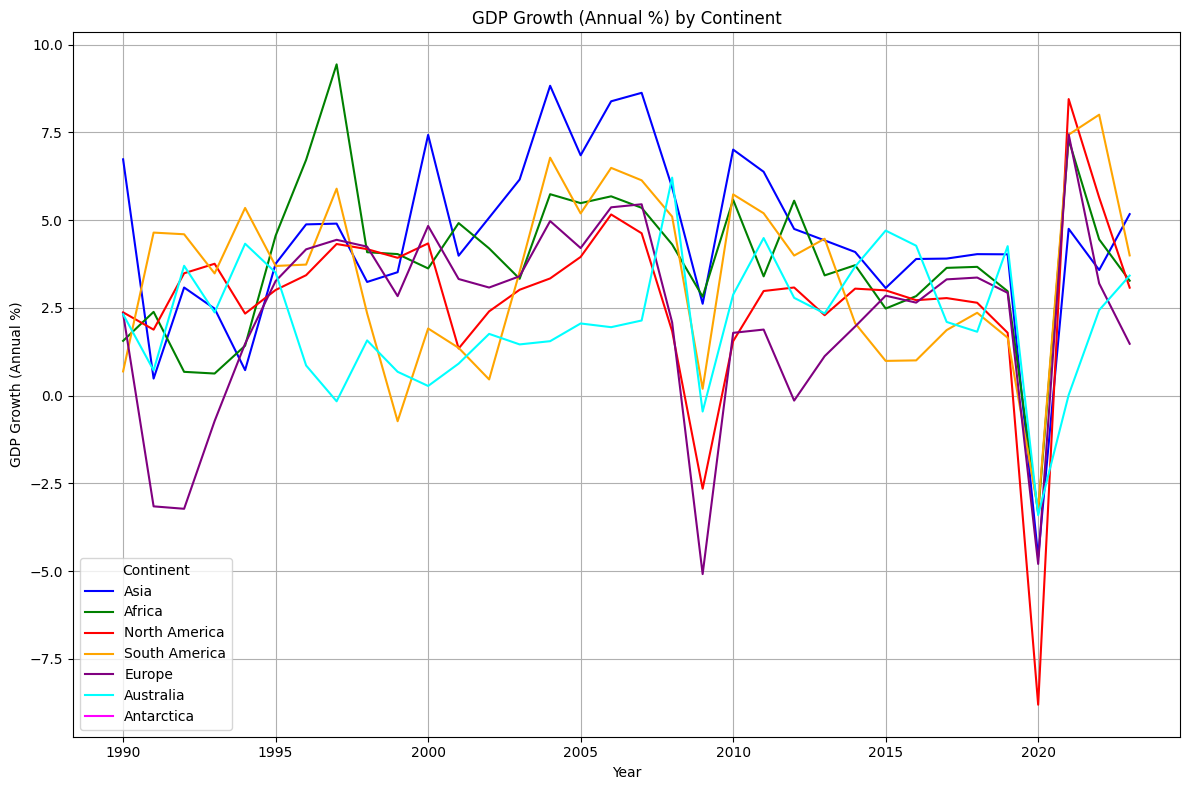

In [16]:
continent_to_countries = {
    'Asia': ['Afghanistan', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Bhutan', 'Brunei Darussalam', 'Cambodia', 'China', 'Georgia',
             'India', 'Indonesia', 'Iran, Islamic Rep.', 'Iraq', 'Israel', 'Japan', 'Jordan', 'Kazakhstan', 'Kuwait', 'Kyrgyz Republic',
             'Lebanon', 'Macao SAR, China', 'Malaysia', 'Maldives', 'Mongolia', 'Myanmar', 'Nepal', 'Pakistan', 'Philippines', 'Qatar',
             'Republic of Korea', 'Russian Federation', 'Saudi Arabia', 'Singapore', 'Sri Lanka', 'Syrian Arab Republic', 'Tajikistan',
             'Thailand', 'Timor-Leste', 'Turkey', 'Turkmenistan', 'United Arab Emirates', 'Uzbekistan', 'Viet Nam', 'Yemen'],
    'Africa': ['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cameroon', 'Central African Republic',
               'Chad', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Djibouti', 'Egypt, Arab Rep.', 'Equatorial Guinea', 'Eritrea',
               'Eswatini', 'Ethiopia', 'Gabon', 'Gambia, The', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Ivory Coast', 'Kenya', 'Lesotho',
               'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Niger',
               'Nigeria', 'Rwanda', 'Senegal', 'Seychelles', 'Sierra Leone', 'South Africa', 'South Sudan', 'Sudan', 'Togo', 'Tunisia',
               'Uganda', 'Zambia', 'Zimbabwe'],
    'North America': ['Antigua and Barbuda', 'Bahamas, The', 'Barbados', 'Belize', 'Canada', 'Cayman Islands', 'Costa Rica', 'Dominican Republic',
                       'El Salvador', 'Guatemala', 'Haiti', 'Honduras', 'Jamaica', 'Mexico', 'Nicaragua', 'Panama', 'United States'],
    'South America': ['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Guyana', 'Paraguay', 'Peru', 'Suriname', 'Trinidad and Tobago',
                      'Uruguay', 'Venezuela, RB'],
    'Europe': ['Albania', 'Andorra', 'Austria', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia',
               'Denmark', 'Estonia', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Latvia',
               'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Moldova', 'Monaco', 'Montenegro', 'Netherlands', 'North Macedonia', 'Norway',
               'Poland', 'Portugal', 'Romania', 'San Marino', 'Serbia', 'Slovak Republic', 'Slovenia', 'Spain', 'Sweden', 'Switzerland',
               'Ukraine', 'United Kingdom'],
    'Australia': ['Australia', 'Fiji', 'Kiribati', 'Marshall Islands', 'Micronesia, Fed. Sts.', 'Nauru', 'New Zealand', 'Palau', 'Papua New Guinea',
                  'Samoa', 'Solomon Islands', 'Tonga', 'Tuvalu', 'Vanuatu'],
    'Antarctica': ['Antarctica']
}

# Flatten the mapping into a list of countries
continent_data = {continent: [] for continent in continent_to_countries}

for continent, countries in continent_to_countries.items():
    continent_data[continent] = countries

# Function to add a continent column to the dataframe
def assign_continent(row):
    for continent, countries in continent_data.items():
        if row['Country Name'] in countries:
            return continent

# Apply the function to the dataframe
merged_data['Continent'] = merged_data.apply(assign_continent, axis=1)


# Assuming df_filtered already contains the 'Continent' column
# Group the data by 'Continent' and 'Year', calculating the mean GDP growth for each group
continent_year_groups = merged_data.groupby(['Continent', 'Year'])['GDP growth (annual %)'].mean().reset_index()

# Create the plot
plt.figure(figsize=(12, 8))

# Define a list of colors (one for each continent)
continent_colors = {
    'Asia': 'blue',
    'Africa': 'green',
    'North America': 'red',
    'South America': 'orange',
    'Europe': 'purple',
    'Australia': 'cyan',
    'Antarctica': 'magenta'
}

# Plot a line for each continent
for continent, color in continent_colors.items():
    continent_data = continent_year_groups[continent_year_groups['Continent'] == continent]
    plt.plot(continent_data['Year'], continent_data['GDP growth (annual %)'], label=continent, color=color)

# Customize the plot
plt.title('GDP Growth (Annual %) by Continent')
plt.xlabel('Year')
plt.ylabel('GDP Growth (Annual %)')
plt.legend(title='Continent')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


In [17]:
# 1. Remittance Growth Rate the percentage change of remittances over time for each country
merged_data['Remittance Growth Rate'] = merged_data.groupby('Country Name')['Personal remittances, received (current US$)'] \
                                    .pct_change() * 100  # Percentage change

# 2. Remittance per Capita:  remittance divided by population
merged_data['Remittance per Capita'] = merged_data['Personal remittances, received (current US$)'] / merged_data['Population, total']

# 3. Remittance Volatility: Calculate the standard deviation of remittances over time for each country
# We will calculate this over a rolling window (e.g., 5 years) for volatility estimation
merged_data['Remittance Volatility'] = merged_data.groupby('Country Name')['Personal remittances, received (current US$)'] \
                                   .transform(lambda x: x.rolling(5, min_periods=1).std())

# 4. Remittance-to-GDP Ratio: Calculate the ratio of remittances to GDP for each year
merged_data['Remittance-to-GDP Ratio'] = merged_data['Personal remittances, received (current US$)'] / merged_data['GDP growth (annual %)']

# Drop NaN values (if any) resulting from calculations like pct_change or rolling std
# final_merged_data.dropna(subset=['Remittance Growth Rate', 'Remittance per Capita', 'Remittance Volatility', 'Remittance-to-GDP Ratio'], inplace=True)

# Check the result
merged_data[['Country Name', 'Year', 'Remittance Growth Rate', 'Remittance per Capita', 'Remittance Volatility', 'Remittance-to-GDP Ratio']].tail()

# Save the final dataset with new features
final_merged_data_with_features_path = '/content/drive/MyDrive/Colab Notebooks/datasience/merged_data_with_feature_eng.csv'
merged_data.to_csv(final_merged_data_with_features_path, index=False)

In [18]:
merged_data.head()

Indicator Name,Country Name,Country Code,Year,"Personal remittances, received (current US$)","Personal remittances, paid (current US$)","Population, total",Net migration,"Unemployment, total (% of total labor force) (modeled ILO estimate)",GDP growth (annual %),Continent,Remittance Growth Rate,Remittance per Capita,Remittance Volatility,Remittance-to-GDP Ratio
0,Afghanistan,AFG,1990,1.647337e+10,9.337060e+09,10694796.0,-666001.0,7.900844,3.315889,Asia,NaN,1540.316387,NaN,4.968009e+09
1,Afghanistan,AFG,1991,1.336975e+09,1.684005e+10,10745167.0,39926.0,7.946000,3.299271,Asia,-91.884022,124.425714,1.070305e+10,4.052335e+08
2,Afghanistan,AFG,1992,1.229938e+09,2.016589e+10,12057433.0,1834556.0,7.940000,3.299271,Asia,-8.005924,102.006610,8.770064e+09,3.727908e+08
3,Afghanistan,AFG,1993,1.563327e+09,1.298386e+10,14003760.0,1171818.0,7.961000,4.035865,Asia,27.106213,111.636264,7.549591e+09,3.873587e+08
4,Afghanistan,AFG,1994,1.563327e+09,1.298386e+10,15455555.0,665410.0,7.980000,4.035865,Asia,0.000000,101.149874,6.732115e+09,3.873587e+08


In [19]:
merged_data['Remittance Growth Rate'] = merged_data['Remittance Growth Rate'].replace([0, np.inf, -np.inf], np.nan)
merged_data['Remittance Volatility'] = merged_data['Remittance Volatility'].replace([0, np.inf, -np.inf], np.nan)
merged_data['Remittance-to-GDP Ratio'] = merged_data['Remittance-to-GDP Ratio'].replace([0, np.inf, -np.inf], np.nan)

In [20]:
merged_data.isnull().sum()

,0
Indicator Name,
Country Name,0
Country Code,0
Year,0
"Personal remittances, received (current US$)",0
"Personal remittances, paid (current US$)",0
"Population, total",0
Net migration,0
"Unemployment, total (% of total labor force) (modeled ILO estimate)",0
GDP growth (annual %),0


In [21]:
merged_data.head()

Indicator Name,Country Name,Country Code,Year,"Personal remittances, received (current US$)","Personal remittances, paid (current US$)","Population, total",Net migration,"Unemployment, total (% of total labor force) (modeled ILO estimate)",GDP growth (annual %),Continent,Remittance Growth Rate,Remittance per Capita,Remittance Volatility,Remittance-to-GDP Ratio
0,Afghanistan,AFG,1990,1.647337e+10,9.337060e+09,10694796.0,-666001.0,7.900844,3.315889,Asia,NaN,1540.316387,NaN,4.968009e+09
1,Afghanistan,AFG,1991,1.336975e+09,1.684005e+10,10745167.0,39926.0,7.946000,3.299271,Asia,-91.884022,124.425714,1.070305e+10,4.052335e+08
2,Afghanistan,AFG,1992,1.229938e+09,2.016589e+10,12057433.0,1834556.0,7.940000,3.299271,Asia,-8.005924,102.006610,8.770064e+09,3.727908e+08
3,Afghanistan,AFG,1993,1.563327e+09,1.298386e+10,14003760.0,1171818.0,7.961000,4.035865,Asia,27.106213,111.636264,7.549591e+09,3.873587e+08
4,Afghanistan,AFG,1994,1.563327e+09,1.298386e+10,15455555.0,665410.0,7.980000,4.035865,Asia,NaN,101.149874,6.732115e+09,3.873587e+08


In [22]:
columns_to_impute = ['Remittance Growth Rate', 'Remittance Volatility', 'Remittance-to-GDP Ratio']

df_impute = merged_data[columns_to_impute]

imputer = KNNImputer(n_neighbors=5)
df_imputed = imputer.fit_transform(df_impute)
df_imputed = pd.DataFrame(df_imputed, columns=columns_to_impute)

merged_data[columns_to_impute] = df_imputed

print(merged_data.isnull().sum())

Indicator Name
Country Name                                                              0
Country Code                                                              0
Year                                                                      0
Personal remittances, received (current US$)                              0
Personal remittances, paid (current US$)                                  0
Population, total                                                         0
Net migration                                                             0
Unemployment, total (% of total labor force) (modeled ILO estimate)       0
GDP growth (annual %)                                                     0
Continent                                                              2924
Remittance Growth Rate                                                    0
Remittance per Capita                                                     0
Remittance Volatility                                                    

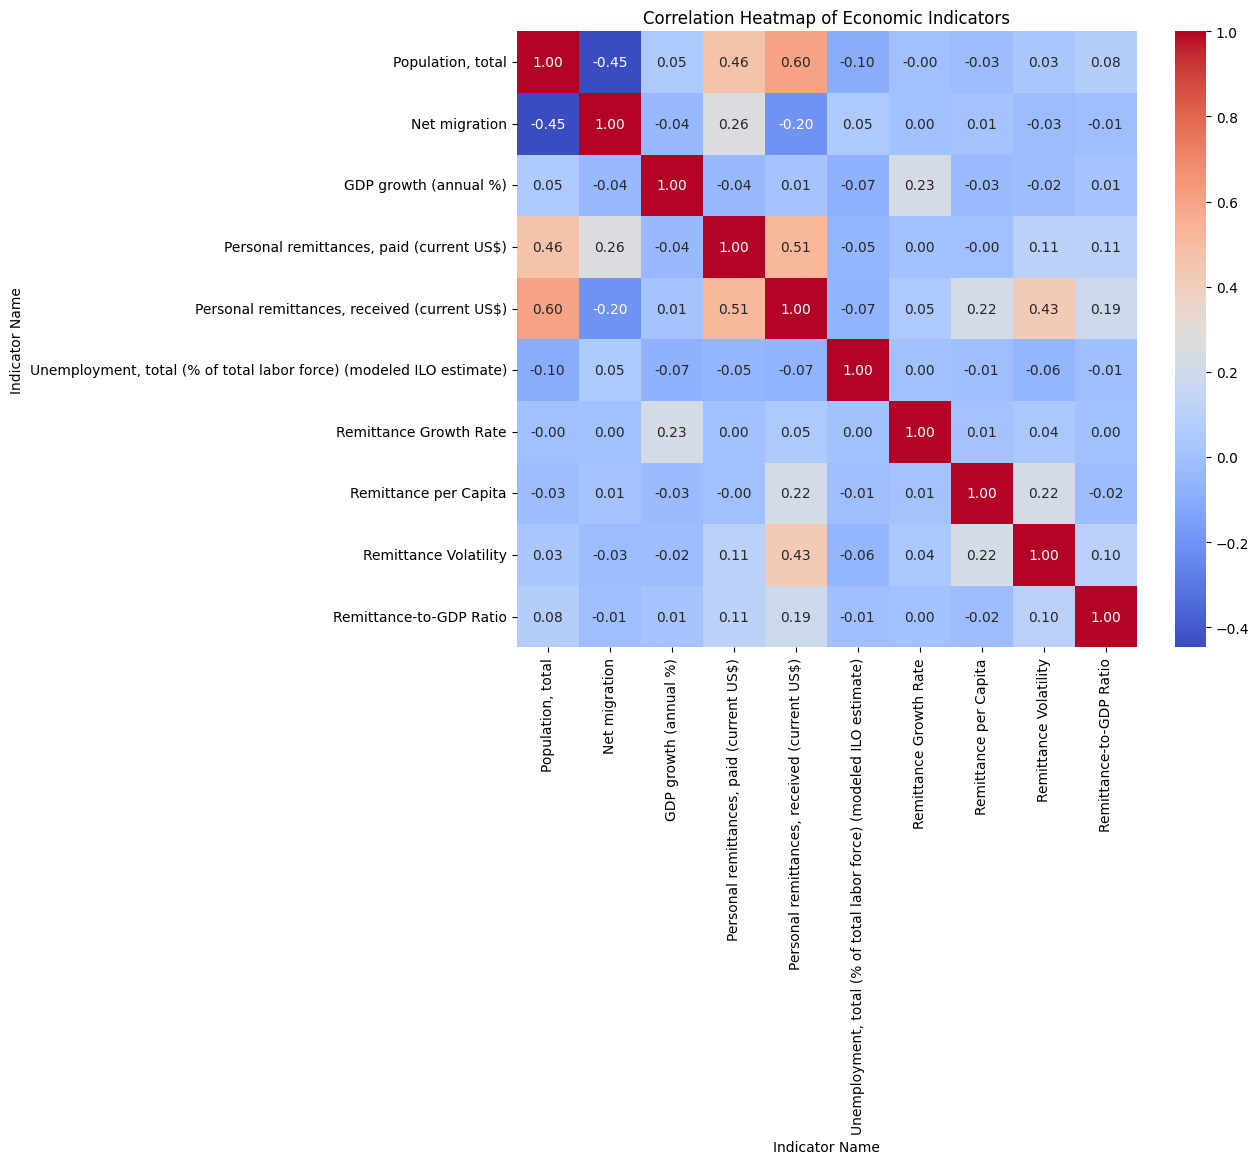

In [23]:
indicators = [
    'Population, total',
    'Net migration',
    'GDP growth (annual %)',
    'Personal remittances, paid (current US$)',
    'Personal remittances, received (current US$)',
    'Unemployment, total (% of total labor force) (modeled ILO estimate)',
    'Remittance Growth Rate',
    'Remittance per Capita',
    'Remittance Volatility',
    'Remittance-to-GDP Ratio'
]

df_economics = merged_data[indicators]
plt.figure(figsize=(10, 8))
correlation_matrix = df_economics.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap of Economic Indicators")
plt.show()

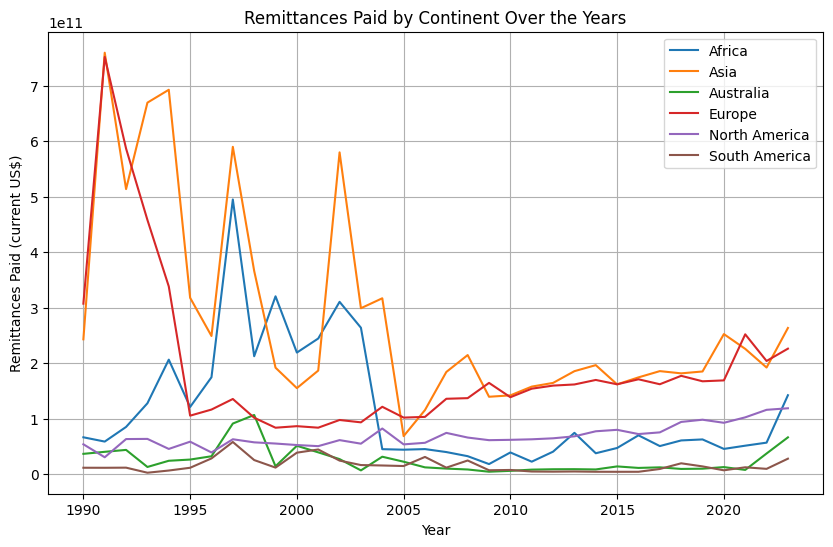

In [24]:

df_grouped = merged_data.groupby(['Continent', 'Year'])['Personal remittances, paid (current US$)'].sum().reset_index()

df_pivot = df_grouped.pivot(index='Year', columns='Continent', values='Personal remittances, paid (current US$)')

plt.figure(figsize=(10, 6))
for continent in df_pivot.columns:
    plt.plot(df_pivot.index, df_pivot[continent], label=continent)

plt.xlabel('Year')
plt.ylabel('Remittances Paid (current US$)')
plt.title('Remittances Paid by Continent Over the Years')
plt.legend()
plt.grid(True)
plt.show()



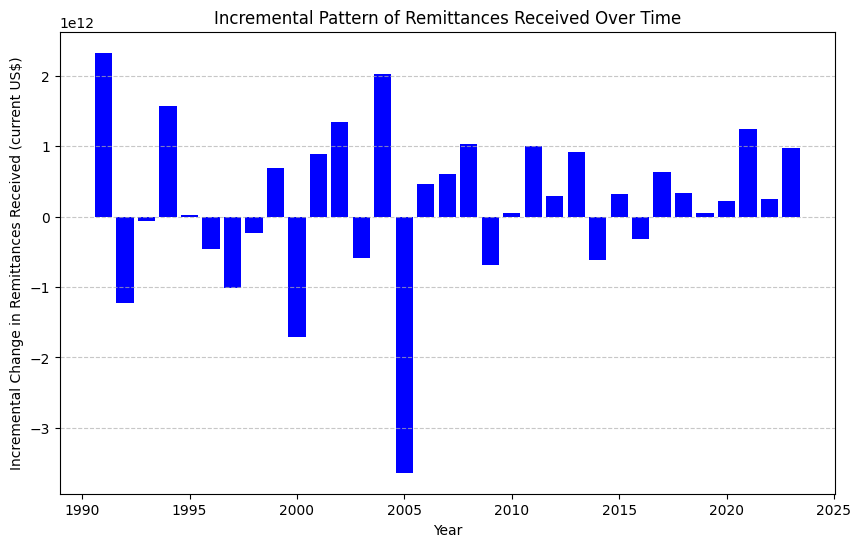

In [25]:
df_grouped = merged_data.groupby('Year')['Personal remittances, received (current US$)'].sum().reset_index()
df_grouped['Remittance Increment'] = df_grouped['Personal remittances, received (current US$)'].diff()
plt.figure(figsize=(10, 6))
plt.bar(df_grouped['Year'], df_grouped['Remittance Increment'], color='b')

plt.xlabel('Year')
plt.ylabel('Incremental Change in Remittances Received (current US$)')
plt.title('Incremental Pattern of Remittances Received Over Time')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()



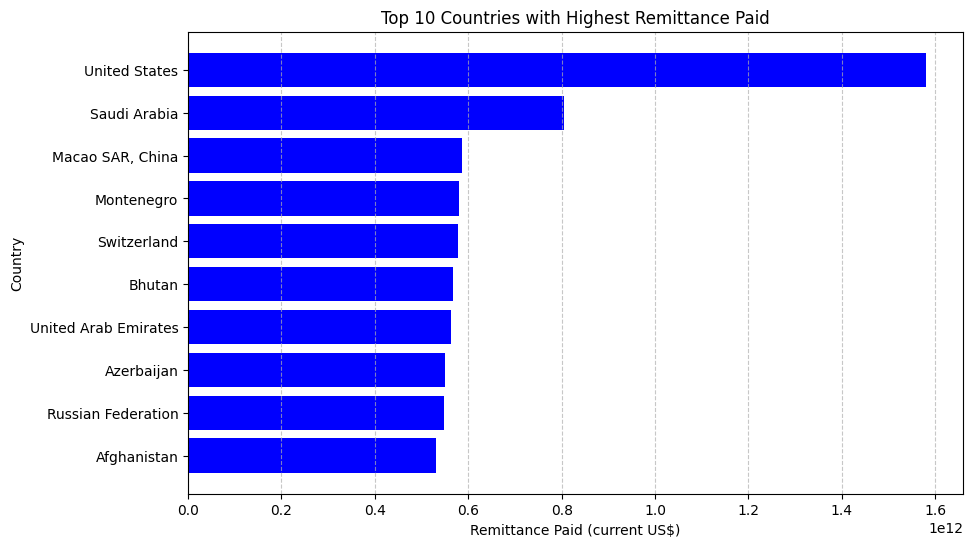

In [26]:
df_filtered = merged_data[merged_data['Continent'].notna()]
df_grouped = df_filtered.groupby('Country Name')['Personal remittances, paid (current US$)'].sum().reset_index()

df_sorted = df_grouped.sort_values(by='Personal remittances, paid (current US$)', ascending=False)
top_10_countries = df_sorted.head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_10_countries['Country Name'], top_10_countries['Personal remittances, paid (current US$)'], color='b')

plt.xlabel('Remittance Paid (current US$)')
plt.ylabel('Country')
plt.title('Top 10 Countries with Highest Remittance Paid')
plt.gca().invert_yaxis()  # To have the highest bar at the top
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.show()


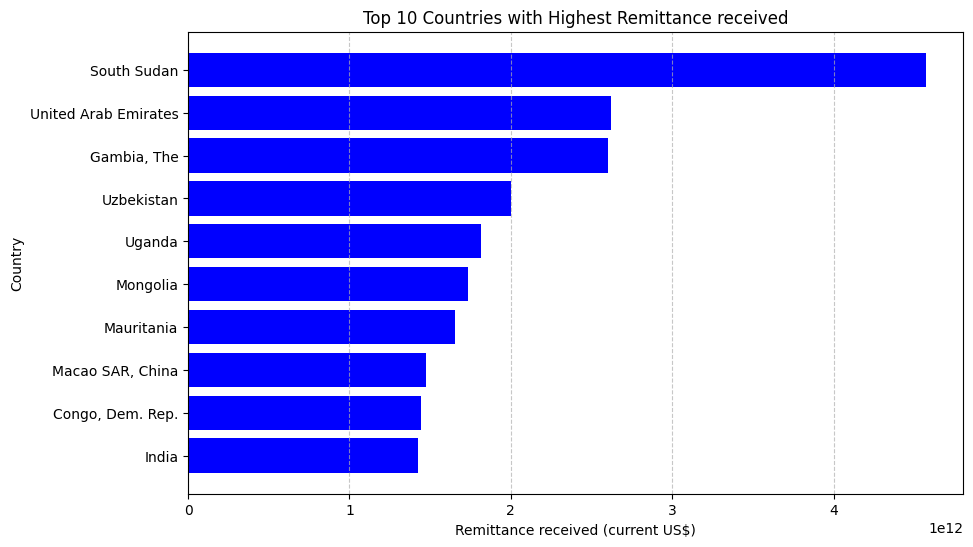

In [27]:
df_filtered = merged_data[merged_data['Continent'].notna()]
df_grouped = df_filtered.groupby('Country Name')['Personal remittances, received (current US$)'].sum().reset_index()

df_sorted = df_grouped.sort_values(by='Personal remittances, received (current US$)', ascending=False)
top_10_countries = df_sorted.head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_10_countries['Country Name'], top_10_countries['Personal remittances, received (current US$)'], color='b')

plt.xlabel('Remittance received (current US$)')
plt.ylabel('Country')
plt.title('Top 10 Countries with Highest Remittance received')
plt.gca().invert_yaxis()  # To have the highest bar at the top
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.show()

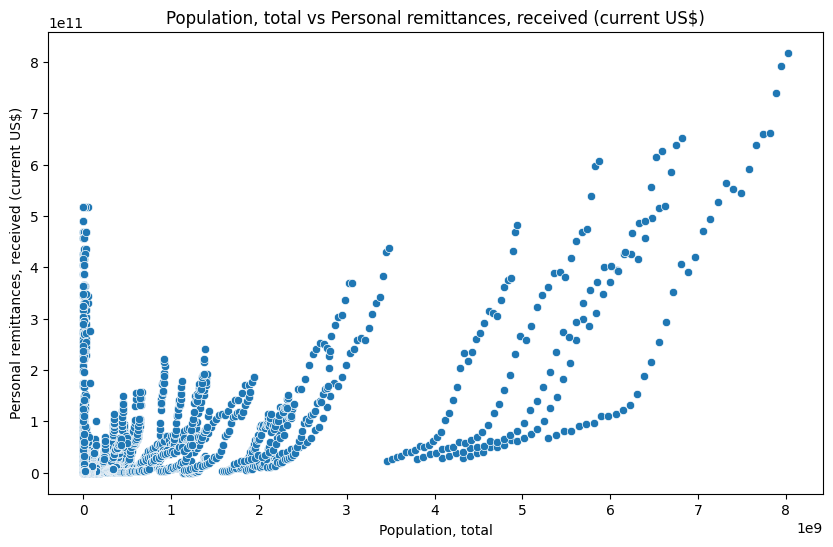

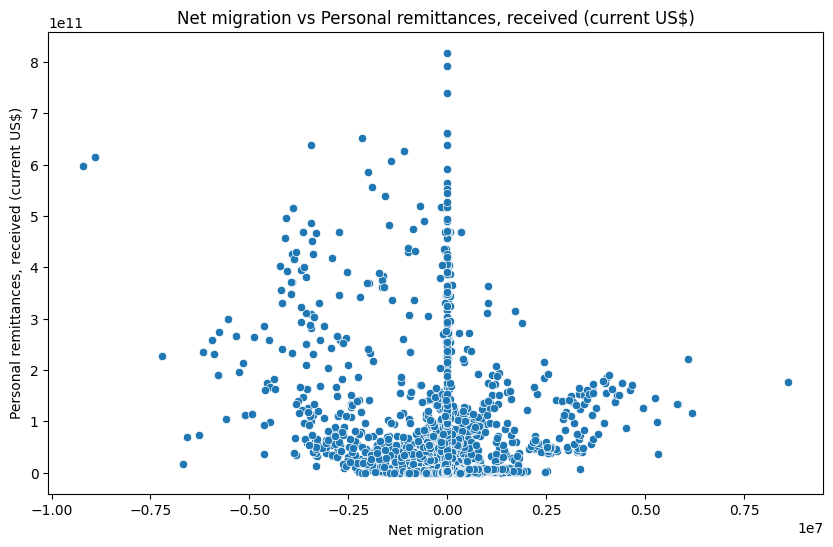

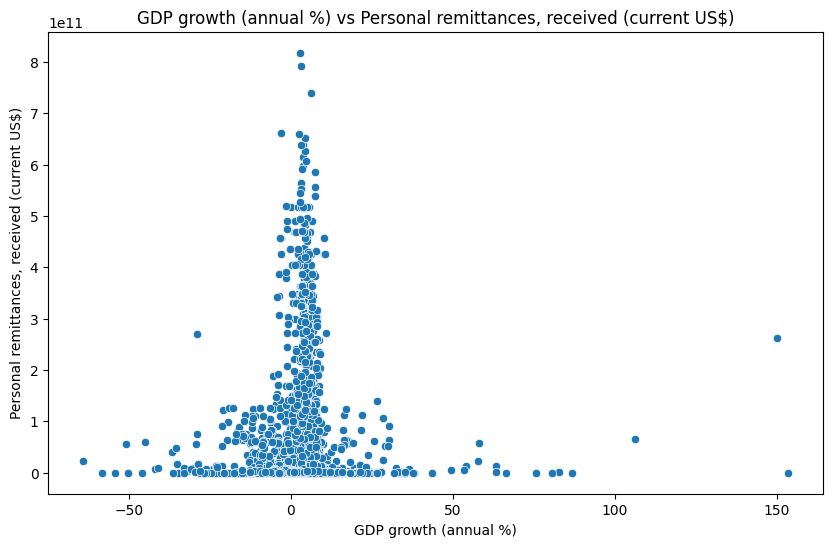

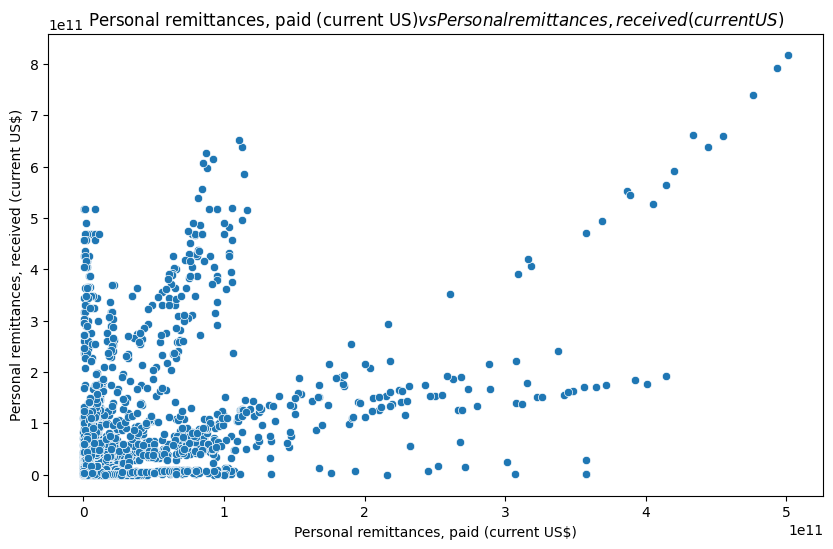

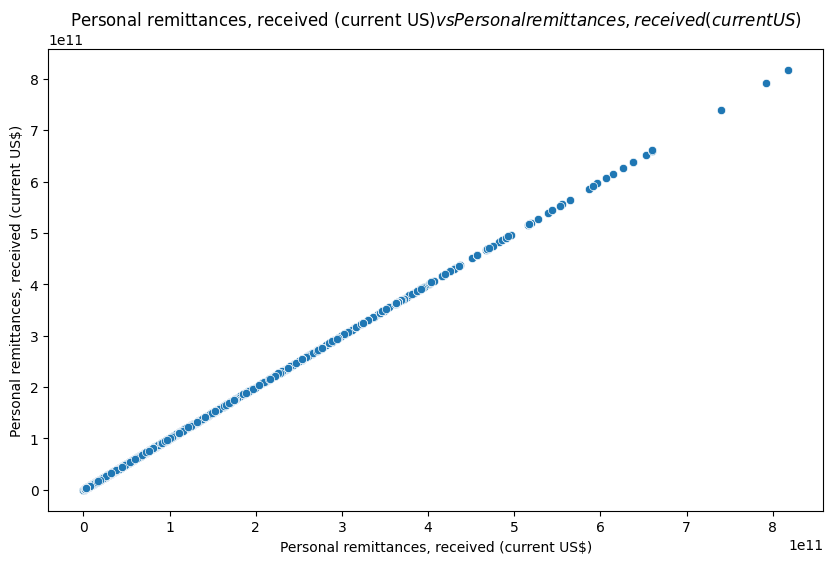

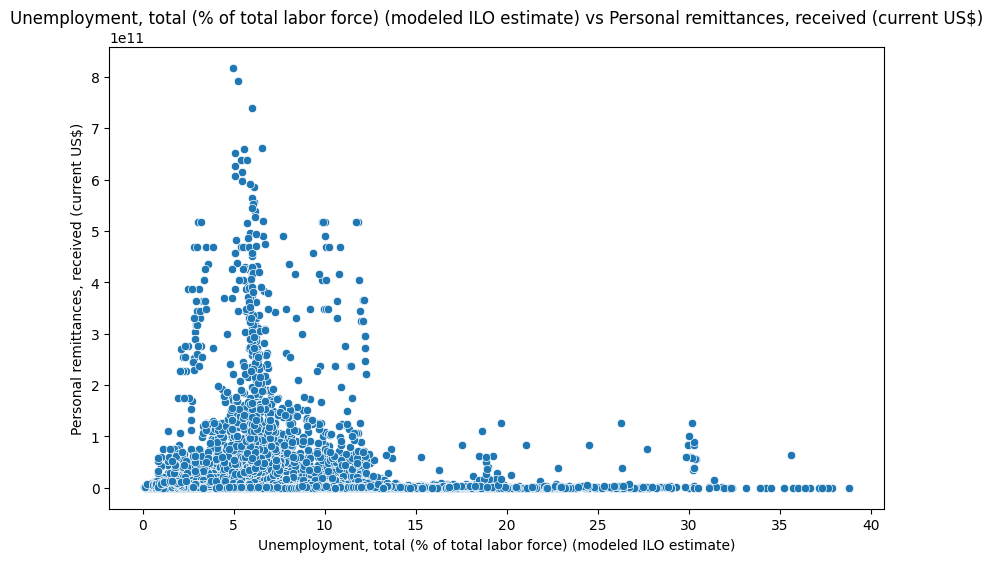

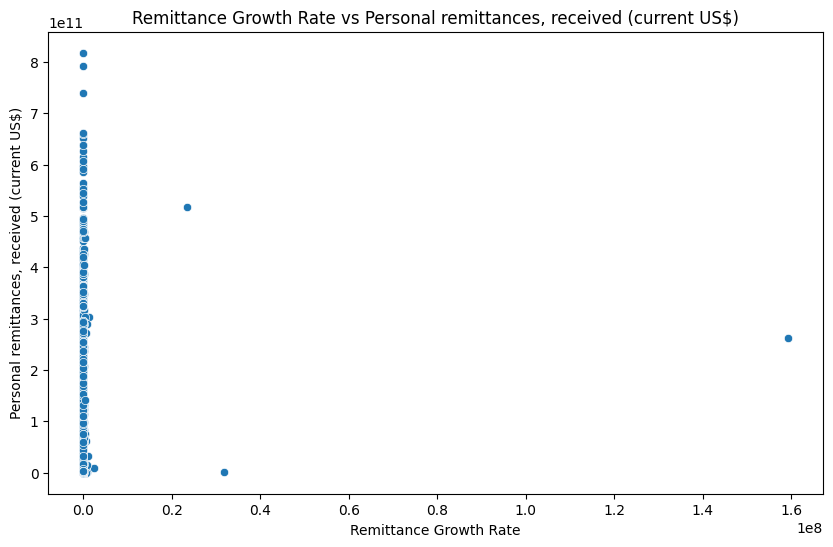

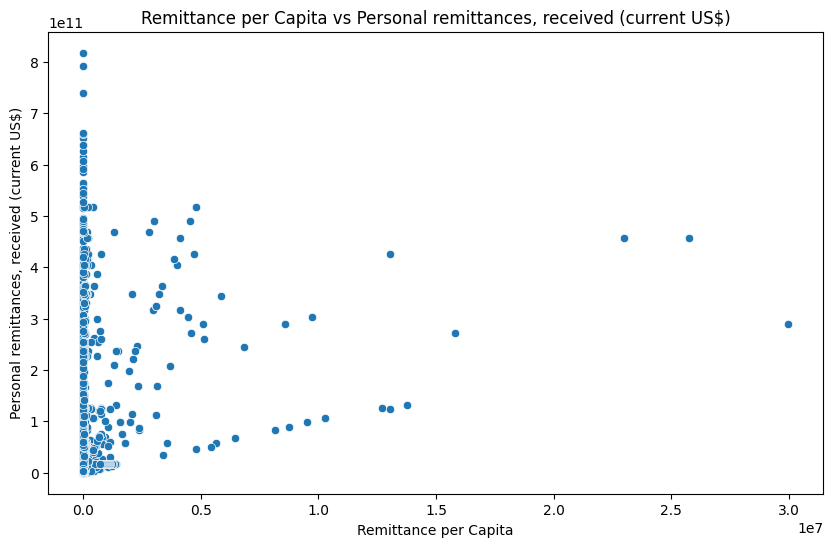

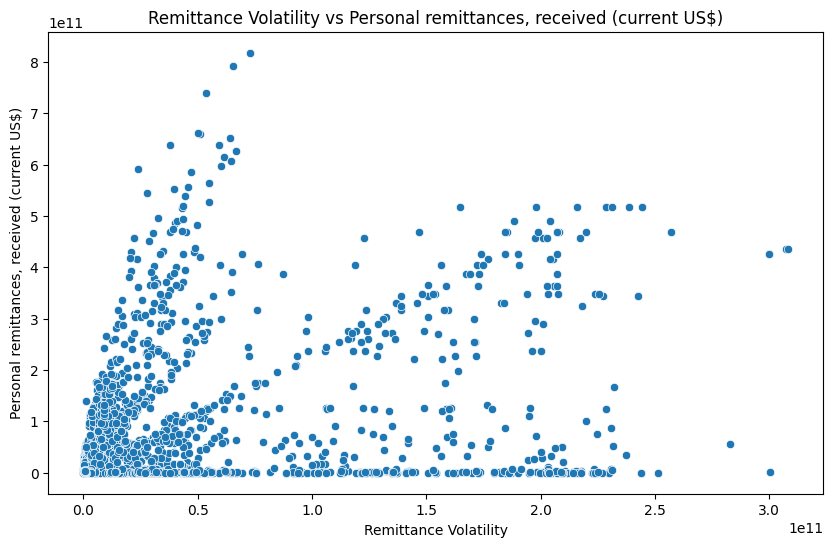

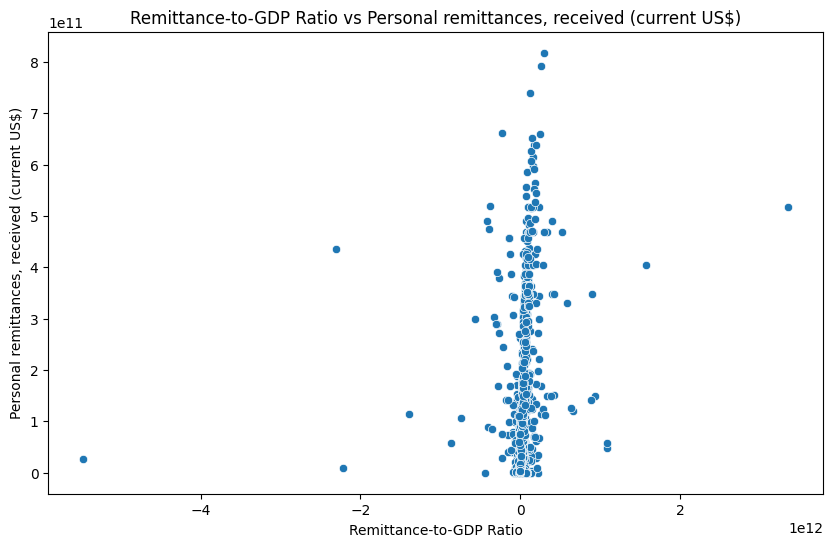

In [28]:
for indicator in indicators:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=merged_data, x=indicator, y='Personal remittances, received (current US$)')
    plt.title(f'{indicator} vs Personal remittances, received (current US$)')
    plt.xlabel(indicator)
    plt.ylabel('Personal remittances, received (current US$)')
    plt.show()

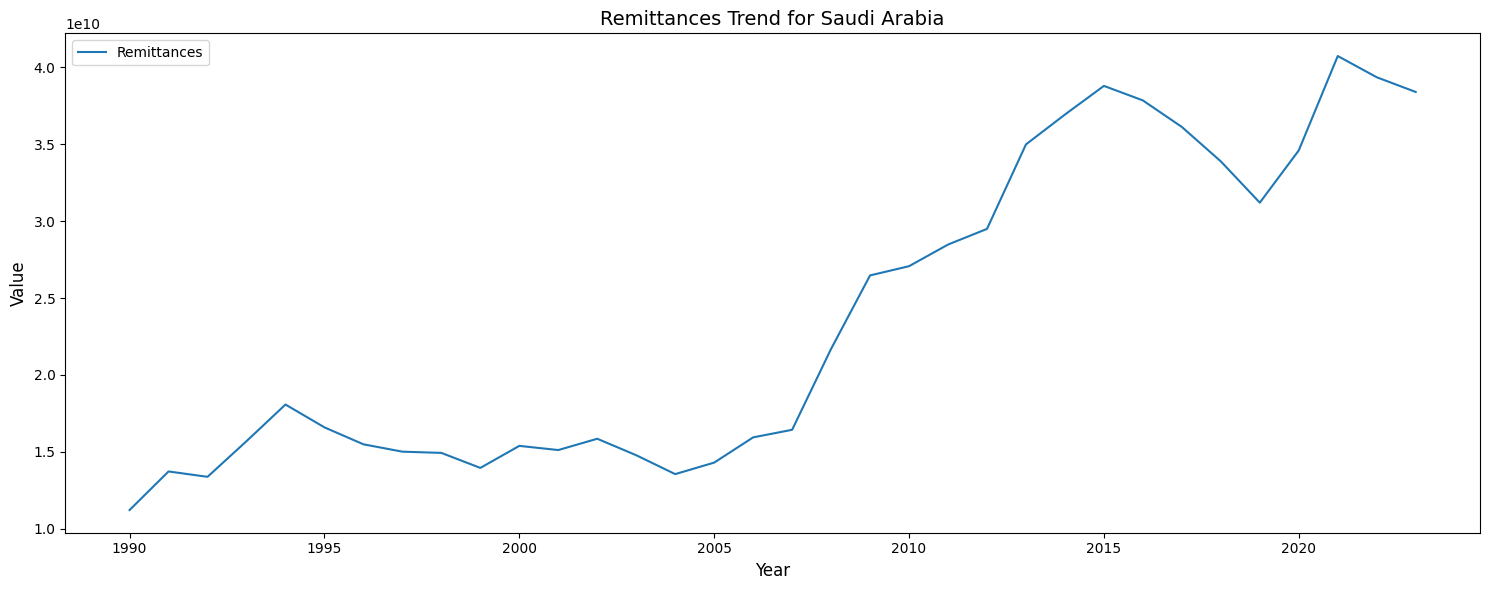

In [29]:
# Time series trend for a specific country
country = 'Saudi Arabia'  # Change to any country you want to analyze
df_country = merged_data[merged_data['Country Name'] == country]

plt.figure(figsize=(15, 6))
sns.lineplot(data=df_country, x='Year', y='Personal remittances, paid (current US$)', label='Remittances')

#sns.lineplot(data=df_country, x='Year', y='GDP (constant 2015 US$)', label='GDP')
plt.title(f'Remittances Trend for {country}', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

In [30]:
# Check for missing or zero values in GDP column
print(df_country[['Year', 'Personal remittances, paid (current US$)', 'GDP growth (annual %)']].isnull().sum())


Indicator Name
Year                                        0
Personal remittances, paid (current US$)    0
GDP growth (annual %)                       0
dtype: int64


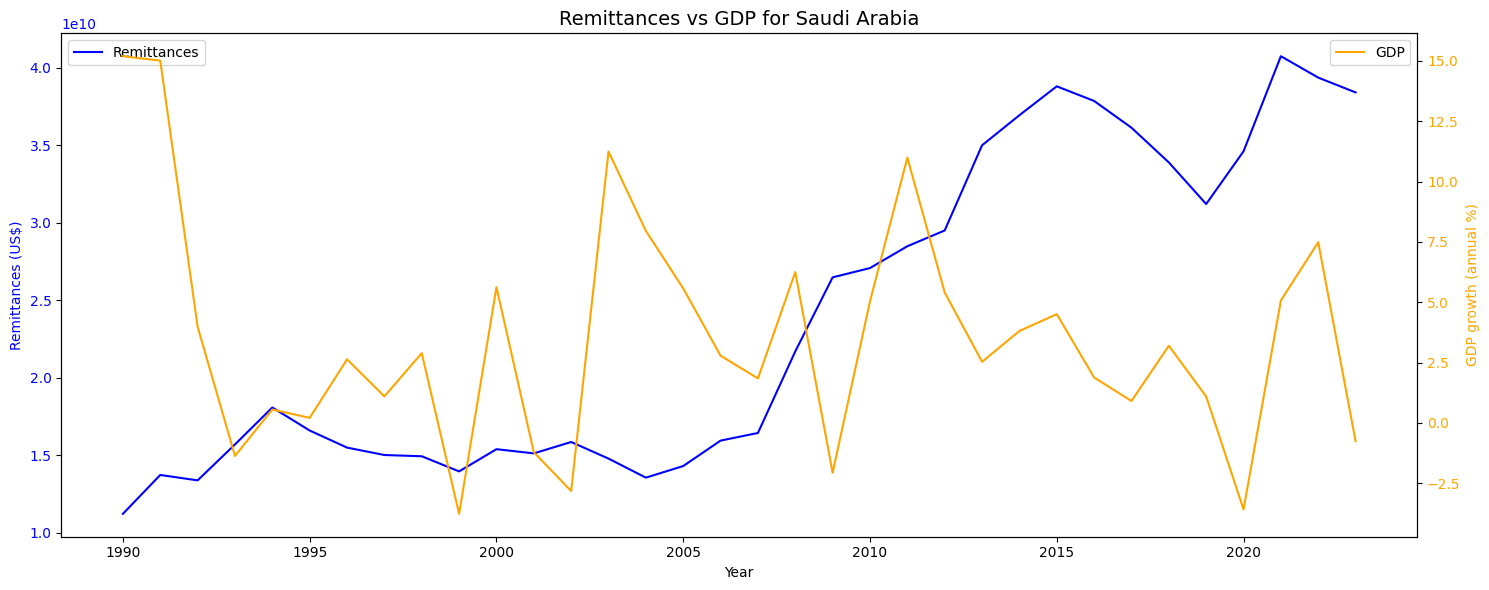

In [31]:
# Plot with Dual Y-Axis
fig, ax1 = plt.subplots(figsize=(15, 6))

# Plot Remittances on the first axis
sns.lineplot(data=df_country, x='Year', y='Personal remittances, paid (current US$)', label='Remittances', ax=ax1, color='blue')
ax1.set_xlabel('Year')
ax1.set_ylabel('Remittances (US$)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second axis for GDP
ax2 = ax1.twinx()  # This creates a second y-axis
sns.lineplot(data=df_country, x='Year', y='GDP growth (annual %)', label='GDP', ax=ax2, color='orange')
ax2.set_ylabel('GDP growth (annual %)', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Title and layout
plt.title(f'Remittances vs GDP for {country}', fontsize=14)
plt.tight_layout()
plt.show()


Machine learning testing:

In [32]:
# Filter data for Asian countries
df_asia = merged_data[merged_data['Country Name'] == 'Saudi Arabia']

# Define target variable and features
target = 'Personal remittances, received (current US$)'

features = [
    'Population, total',
    'Net migration',
    'GDP growth (annual %)',
    'Personal remittances, paid (current US$)',
    'Unemployment, total (% of total labor force) (modeled ILO estimate)',
    'Remittance Growth Rate',
    'Remittance per Capita',
    'Remittance Volatility',
    'Remittance-to-GDP Ratio'
]
# Prepare the features and target
X = df_asia[features]
y = df_asia[target]


In [33]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Initialize and train model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


LinearRegression()

In [35]:
from sklearn.ensemble import RandomForestRegressor
# Initialize and train model
rf_model = RandomForestRegressor(n_estimators=75, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(n_estimators=75, random_state=42)

In [36]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize and train model
gb_model = GradientBoostingRegressor(n_estimators=105, random_state=42)
gb_model.fit(X_train, y_train)


GradientBoostingRegressor(n_estimators=105, random_state=42)

In [37]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import numpy as np

# Evaluate Linear Regression
y_pred_lr = lr_model.predict(X_test)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

print("Linear Regression - MAE:", mae_lr)
print("Linear Regression - R-squared:", r2_lr)
print("Linear Regression - RMSE:", rmse_lr)

# Evaluate Random Forest
y_pred_rf = rf_model.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print("Random Forest - MAE:", mae_rf)
print("Random Forest - R-squared:", r2_rf)
print("Random Forest - RMSE:", rmse_rf)

# Evaluate Gradient Boosting
y_pred_gb = gb_model.predict(X_test)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))

print("Gradient Boosting - MAE:", mae_gb)
print("Gradient Boosting - R-squared:", r2_gb)
print("Gradient Boosting - RMSE:", rmse_gb)


Linear Regression - MAE: 22581836.078416314
Linear Regression - R-squared: 0.9934201441041343
Linear Regression - RMSE: 23171064.013953615
Random Forest - MAE: 25539693.05449269
Random Forest - R-squared: 0.9810069382927091
Random Forest - RMSE: 39367267.88322358
Gradient Boosting - MAE: 16557204.52845997
Gradient Boosting - R-squared: 0.9944200707280748
Gradient Boosting - RMSE: 21337922.47495797


# Forcasting

In [42]:
from statsmodels.tsa.arima.model import ARIMA

def fit_arima_forecast(country_data, forecast_years=10):
    time_data = pd.DataFrame({'Date': country_data['Year'], 'Value': country_data['Personal remittances, received (current US$)']})
    time_data.set_index('Date', inplace=True)

    # Make the series stationary by differencing
    time_data['Differenced'] = time_data['Value'].diff().dropna()
    time_data = time_data.dropna()  # Drop NaN values

    model = ARIMA(time_data['Value'], order=(1, 1, 1))  # ARIMA(p, d, q)
    model_fit = model.fit()

    forecast = model_fit.forecast(steps=forecast_years)
    forecast_years_index = list(range(time_data.index[-1] + 1, time_data.index[-1] + 1 + forecast_years))

    forecast_df = pd.DataFrame({'Year': forecast_years_index, 'Forecasted Personal remittances, received': forecast})
    return forecast_df


In [43]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

def fit_hw_forecast(country_data, forecast_years=10):
    time_data = pd.DataFrame({'Date': country_data['Year'], 'Value': country_data['Personal remittances, received (current US$)']})
    time_data.set_index('Date', inplace=True)

    # Fit Exponential Smoothing model
    model = ExponentialSmoothing(time_data['Value'], trend='add', seasonal='add', seasonal_periods=12)
    model_fit = model.fit()

    forecast = model_fit.forecast(steps=forecast_years)
    forecast_years_index = list(range(time_data.index[-1] + 1, time_data.index[-1] + 1 + forecast_years))

    forecast_df = pd.DataFrame({'Year': forecast_years_index, 'Forecasted Personal remittances, received': forecast})
    return forecast_df


In [44]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

def fit_sarima_forecast(country_data, forecast_years=10):
    time_data = pd.DataFrame({'Date': country_data['Year'], 'Value': country_data['Personal remittances, received (current US$)']})
    time_data.set_index('Date', inplace=True)

    model = SARIMAX(time_data['Value'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
    model_fit = model.fit()

    forecast = model_fit.forecast(steps=forecast_years)
    forecast_years_index = list(range(time_data.index[-1] + 1, time_data.index[-1] + 1 + forecast_years))

    forecast_df = pd.DataFrame({'Year': forecast_years_index, 'Forecasted Personal remittances, received': forecast})
    return forecast_df


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Usin

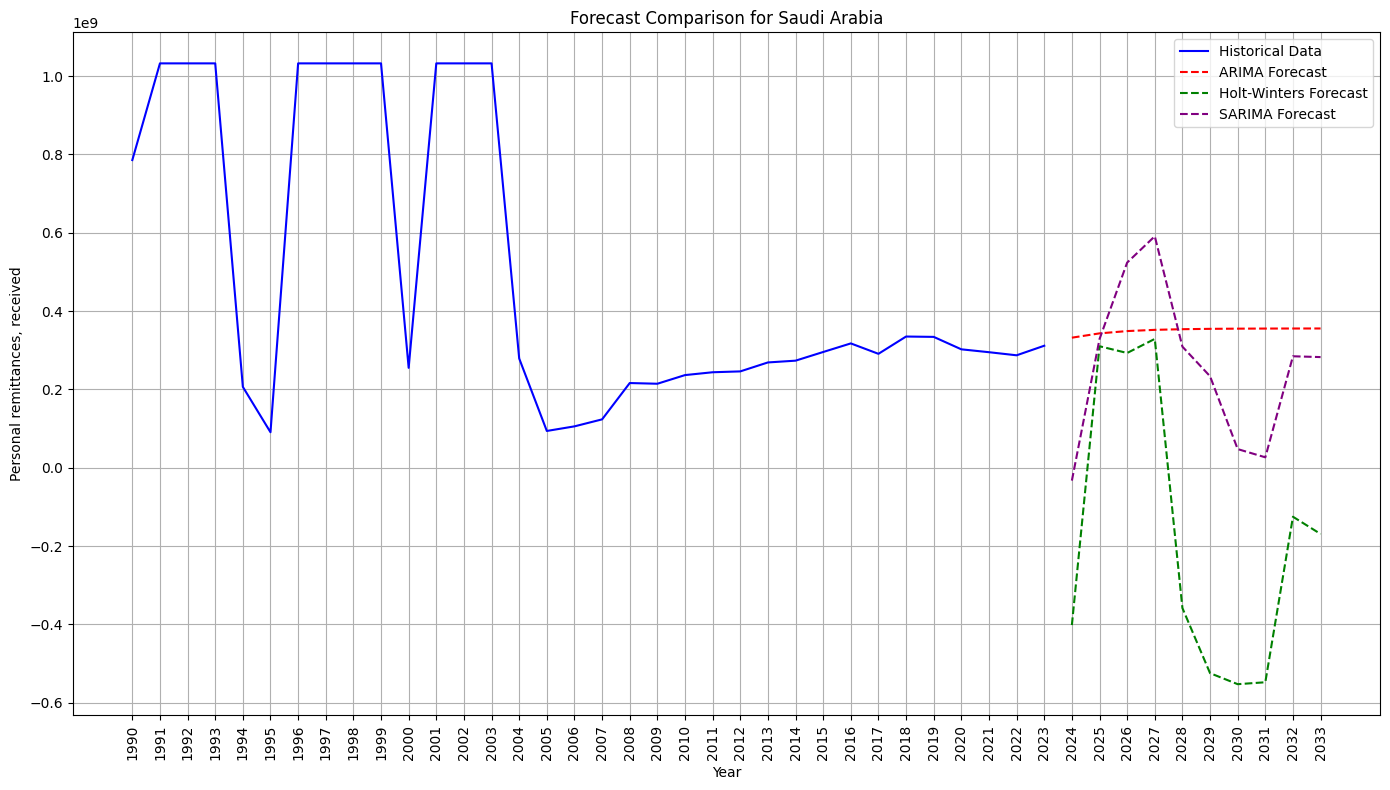

In [45]:
import matplotlib.pyplot as plt

def compare_forecasts(country_data, forecast_years=10):
    time_data = pd.DataFrame({'Date': country_data['Year'], 'Value': country_data['Personal remittances, received (current US$)']})
    time_data.set_index('Date', inplace=True)

    # Fit and forecast with multiple models
    arima_forecast = fit_arima_forecast(country_data, forecast_years)
    hw_forecast = fit_hw_forecast(country_data, forecast_years)
    sarima_forecast = fit_sarima_forecast(country_data, forecast_years)

    # Ensure forecast starts after the last actual year
    last_actual_year = time_data.index[-1]

    # Plotting the historical data and all forecasts
    plt.figure(figsize=(14, 8))
    plt.plot(time_data.index, time_data['Value'], label='Historical Data', color='blue')

    # Forecasting years (start after the last actual year)
    forecast_years_index = [last_actual_year + i for i in range(1, forecast_years + 1)]

    # Plot each forecasted series
    plt.plot(forecast_years_index, arima_forecast['Forecasted Personal remittances, received'], label='ARIMA Forecast', linestyle='--', color='red')
    plt.plot(forecast_years_index, hw_forecast['Forecasted Personal remittances, received'], label='Holt-Winters Forecast', linestyle='--', color='green')
    plt.plot(forecast_years_index, sarima_forecast['Forecasted Personal remittances, received'], label='SARIMA Forecast', linestyle='--', color='purple')

    # Set x-axis to show every year
    all_years = list(time_data.index) + forecast_years_index
    plt.xticks(all_years, rotation=90)  # Rotate the year labels to avoid overlap

    plt.title(f'Forecast Comparison for {country_data["Country Name"].iloc[0]}')
    plt.xlabel('Year')
    plt.ylabel('Personal remittances, received')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Run the comparison for each country
for country in df_country['Country Name'].unique():
    country_data = df_country[df_country['Country Name'] == country]
    compare_forecasts(country_data, forecast_years=10)
